## Sample Exercise

For this set of exercises we're using data from the Federal Reserve Economic Database (FRED) concerning the
Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

<a href='https://fred.stlouisfed.org/series/IPG2211A2N'>Data Source</a>

In [1]:
# Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Data Load and validation

In [2]:
df = pd.read_csv('D://ML-Datasets//Udemy-TimeSeries//EnergyProduction.csv',
                index_col='DATE', parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [3]:
# set the index frequency to MS (Month Start)
df.index.freq = 'MS'
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### Global Constants

In [4]:
span = 12
alpha = 2/(span + 1)

#### Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels SimpleExpSmoothing function. Plot the result.

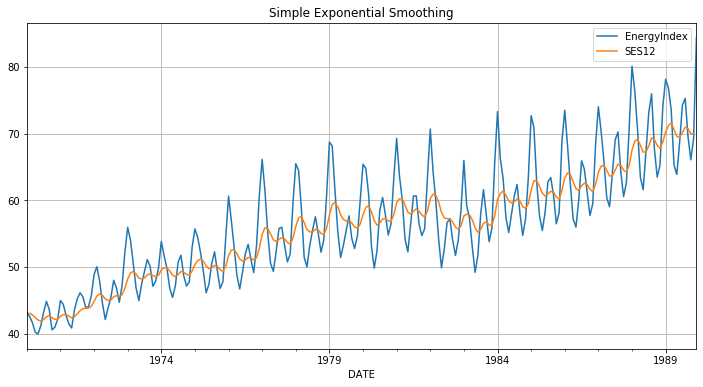

In [5]:
fitted_model = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=alpha, optimized=False)
df['SES12'] = fitted_model.fittedvalues.shift(-1)

df[['EnergyIndex', 'SES12']].plot(figsize=(12, 6), title='Simple Exponential Smoothing', grid=True).autoscale(axis='x', 
                                                                                                  tight=True)

#### Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Miniconda3\envs\tensorflow-cpu\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


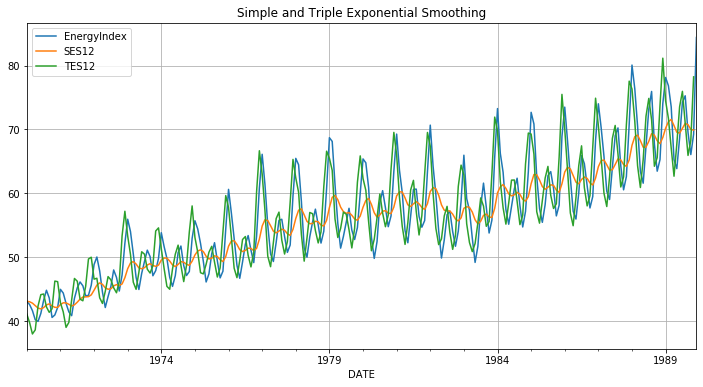

In [6]:
fitted_model = ExponentialSmoothing(df['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12).fit()
df['TES12'] = fitted_model.fittedvalues.shift(-1)

df[['EnergyIndex', 'SES12', 'TES12']].plot(figsize=(12, 6), 
                title='Simple and Triple Exponential Smoothing', grid=True).autoscale(axis='x', tight=True)

#### Plot the same as above, but for only the first two years.

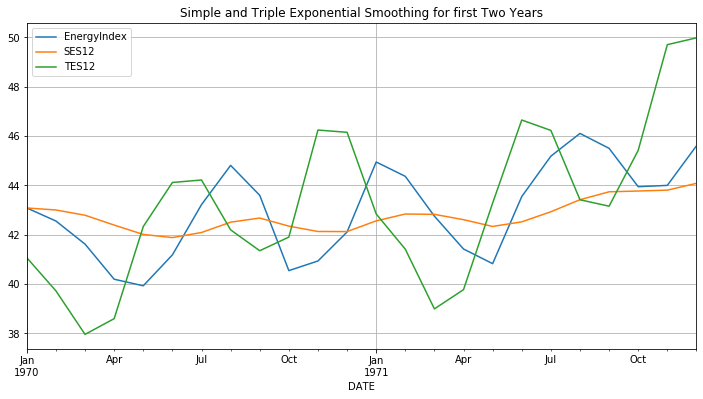

In [7]:
df.iloc[:24].plot(figsize=(12, 6), 
                title='Simple and Triple Exponential Smoothing for first Two Years', grid=True).autoscale(axis='x', 
                                                                                               tight=True)